In [1]:
import pandas as pd
import seaborn as sns
from utils import DATA_DIR

In [2]:
metadata = pd.read_csv(f'{DATA_DIR}/metadata.csv')
# cast to string as all data is pretty much categorical
metadata = metadata.astype(str)
metadata.head()

,cell_id,day,donor,cell_type,technology
0,c2150f55becb,2,27678,HSC,citeseq
1,65b7edf8a4da,2,27678,HSC,citeseq
2,c1b26cb1057b,2,27678,EryP,citeseq
3,917168fa6f83,2,27678,NeuP,citeseq
4,2b29feeca86d,2,27678,EryP,citeseq


In [3]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281528 entries, 0 to 281527
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   cell_id     281528 non-null  object
 1   day         281528 non-null  object
 2   donor       281528 non-null  object
 3   cell_type   281528 non-null  object
 4   technology  281528 non-null  object
dtypes: object(5)
memory usage: 10.7+ MB


In [4]:
# Cells are destroyed by analysis, so each cell is only observed once (1 `cell_id` per row)
print(metadata.groupby("cell_id").nunique().shape[0] == metadata.shape[0])

True


In [5]:
# 4 donors each have 8 cell types, 5 days, and 2 assays 
# Donor 27678 has ~20% fewer samples
metadata.groupby(['donor']).nunique()

,cell_id,day,cell_type,technology
donor,,,,
13176,73211,5,8,2
27678,60995,5,8,2
31800,74963,5,8,2
32606,72359,5,8,2


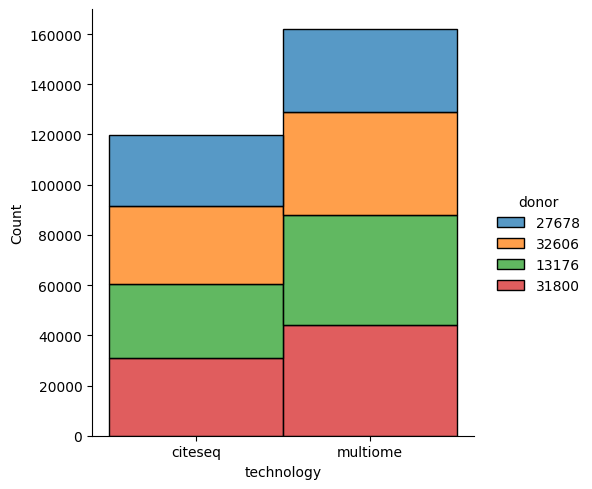

In [7]:
# Consistently more multiome samples across donors
sns.displot(metadata, x="technology", hue="donor", multiple="stack")

In [8]:
# `hidden` cell types have only 1 assay, `multiome`
_ = metadata[metadata.cell_type == 'hidden']['technology'].nunique() == 1
metadata[metadata.cell_type == 'hidden']['technology'].head(1)

119651    multiome
Name: technology, dtype: object

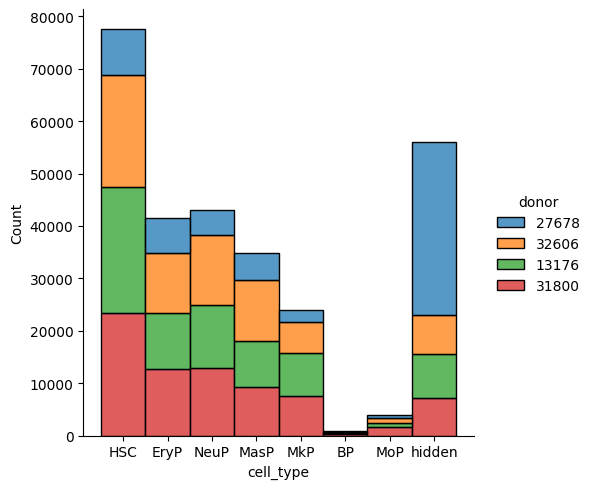

In [9]:
# large imbalances across cell types and donors
# Donor 27678 mostly `hidden`, 
# `BP` cell type very low sample size
sns.displot(metadata, x="cell_type", hue="donor", multiple="stack")

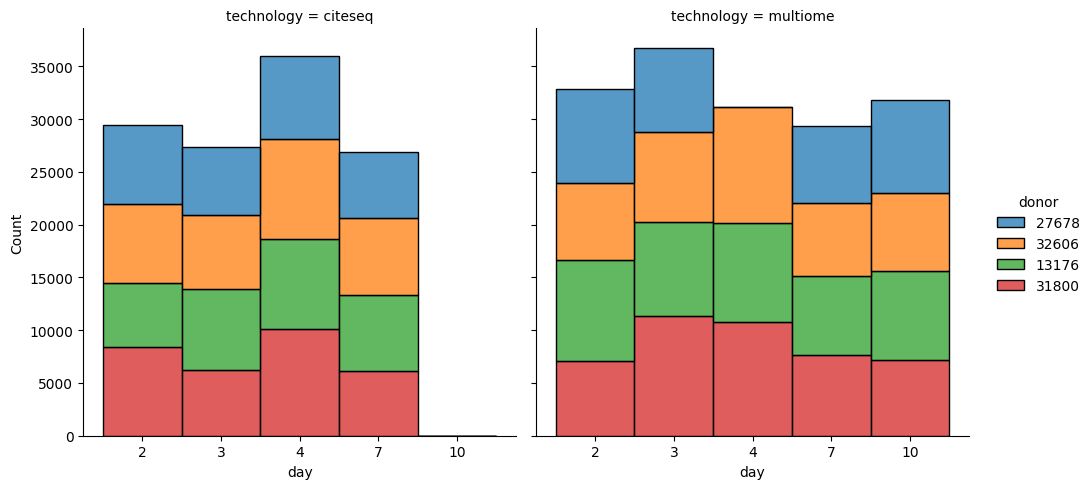

In [8]:
sns.displot(metadata, x="day", col='technology', hue="donor", multiple="stack")

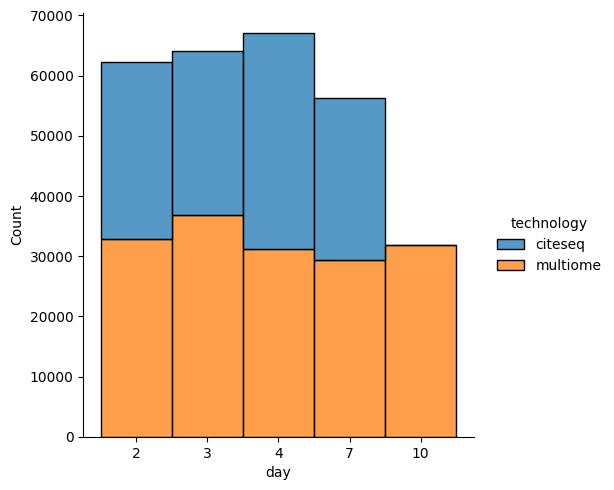

In [11]:
# No CiteSeq for last day (10) 
sns.displot(metadata, x="day", hue="technology", multiple="stack")

# 27687 Meta

In [20]:
test_cite_27678 = pd.read_csv(f'{DATA_DIR}/metadata_cite_day_2_donor_27678.csv')

In [21]:
test_cite_27678 # type: ignore 

,cell_id,day,donor,cell_type,technology
0,83d6659a6a32,2,27678,NeuP,citeseq
1,d98594f13d2e,2,27678,NeuP,citeseq
2,5f93d8ffc72f,2,27678,NeuP,citeseq
3,7dfa2699d351,2,27678,EryP,citeseq
4,6d2533edd0e0,2,27678,HSC,citeseq
...,...,...,...,...,...
7011,be92120b3a00,2,27678,HSC,citeseq
7012,396d0c31d41c,2,27678,HSC,citeseq
7013,ef6bf272cdcf,2,27678,EryP,citeseq
7014,6339da0de3a0,2,27678,HSC,citeseq


# Evaluation Ids

A map from `cell_id` X `gene_id` -> `row_id`

In [12]:
evaluation_ids = pd.read_csv(f'{DATA_DIR}/evaluation_ids.csv')

In [13]:
evaluation_ids # type: ignore 

,row_id,cell_id,gene_id
0,0,c2150f55becb,CD86
1,1,c2150f55becb,CD274
2,2,c2150f55becb,CD270
3,3,c2150f55becb,CD155
4,4,c2150f55becb,CD112
...,...,...,...
65744175,65744175,2c53aa67933d,ENSG00000134419
65744176,65744176,2c53aa67933d,ENSG00000186862
65744177,65744177,2c53aa67933d,ENSG00000170959
65744178,65744178,2c53aa67933d,ENSG00000107874


#  Sample Submission

In [ ]:
sample = pd.read_csv(f'{DATA_DIR}/sample_submission.csv')

In [15]:
sample.head()

,row_id,target
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0


In [16]:
sample.describe()

,row_id,target
count,6.574418e+07,65744180.0
mean,3.287209e+07,0.0
std,1.897871e+07,0.0
min,0.000000e+00,0.0
25%,1.643604e+07,0.0
50%,3.287209e+07,0.0
75%,4.930813e+07,0.0
max,6.574418e+07,0.0
